In [6]:
import tensorflow as tf
from tensorflow import keras

2024-09-06 17:29:31.993000: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# loading the 'Fashion MNIST Dataset'
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

class_names[y_train[0]]

'Coat'

dense layer 1 : 784 * 300
dense layer 2 : 300 * 100
dense layer 3 : 100 * 10

In [10]:
# creating a Multi Layer Perceptron
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="relu"))

# Or pass a list to the Sequential constructor

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]), # passthrough layer
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])


model.summary()

/Users/macbookpro/Dev/tensor-flow/.env/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
%pip install pydot
%pip install pydot-ng

!brew install graphviz



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Auto-updated Homebrew!
Updated 3 taps (homebrew/services, homebrew/core and homebrew/cask).
==> New Formulae
bc-gh                                    wush
==> New Casks
blood-on-the-clocktower-online           flutterflow
choice-financial-terminal

You have 29 outdated formulae installed.

To reinstall 12.1.0, run:
  brew reinstall graphviz


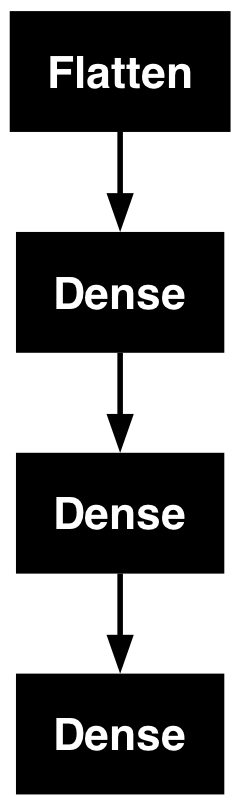

In [12]:
keras.utils.plot_model(model)

In [13]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [14]:
hidden1 = model.layers[1]
hidden1.name

'dense'

All the parameters of a layer can be accessed using get_weights() and set_weights() methods (connection weights, bias terms).

In [15]:
weights, biases = hidden1.get_weights()
weights, weights.shape

(array([[ 0.05210367, -0.07027292,  0.07221872, ...,  0.00090332,
          0.00543538,  0.03213406],
        [ 0.00166885, -0.07396954, -0.06534563, ..., -0.03262025,
         -0.05884129,  0.04002591],
        [-0.04643235,  0.01378572,  0.05810162, ..., -0.06676475,
          0.01510144,  0.06832644],
        ...,
        [ 0.0532295 , -0.06307286, -0.05164953, ..., -0.04098597,
         -0.01334435, -0.04271845],
        [-0.05345951,  0.00358945, -0.06422591, ..., -0.03933832,
         -0.04659637, -0.00263709],
        [-0.03037884, -0.01196562, -0.01235842, ...,  0.03771689,
         -0.06498615, -0.0028515 ]], dtype=float32),
 (784, 300))

In [16]:
# compiling the model

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [17]:
# training and evaluating
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6876 - loss: 0.9885 - val_accuracy: 0.8194 - val_loss: 0.5209
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8288 - loss: 0.4959 - val_accuracy: 0.8394 - val_loss: 0.4639
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8436 - loss: 0.4481 - val_accuracy: 0.8526 - val_loss: 0.4307
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8545 - loss: 0.4190 - val_accuracy: 0.8622 - val_loss: 0.3997
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8629 - loss: 0.3928 - val_accuracy: 0.8652 - val_loss: 0.3926
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8659 - loss: 0.3855 - val_accuracy: 0.8712 - val_loss: 0.3715
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8714 - loss: 0.3660 - val_accuracy: 0.8756 - val_loss: 0.3706
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8762 - loss: 0.3510 - 

In [18]:
%pip install pandas matplotlib


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


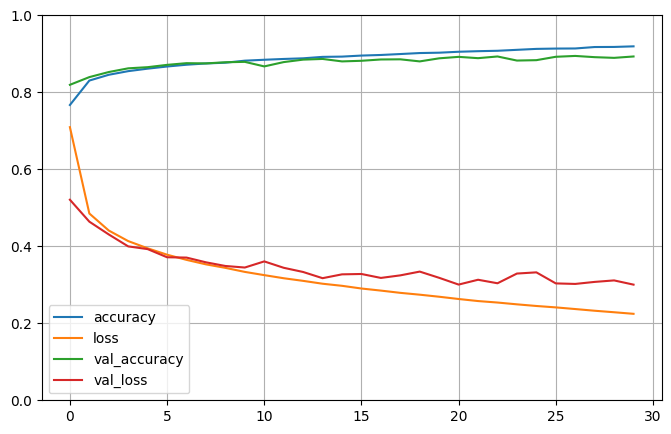

In [19]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting vertical range to 0-1
plt.show()

In [20]:
# checking the generalization error
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8495 - loss: 59.5019


[62.200862884521484, 0.847100019454956]

In [21]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
y_pred = model.predict_classes(X_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'